### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Photometric transformations**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

Image is defined as two dimensional function *f(x,y)* where x and y are spatial (plane) coordinates, and the amplitud of *f* at any pair of coordinates (*x*, *y*) is called the intensity of the image at that point.


#### Image processing has 3 types of computerized process:
* Low-level
    it involves in basic operations such as image preprocessing to **reduce noise**, **constrat ehancement** and image sharpening.

    IMAGE (INPUT) -> [ OPERATIONS ] -> IMAGE (OUTPUT)
* Mid-level
    it involves tasks such as **segmentation**, **classification of individual objects**.

    IMAGE (INPUT) -> [ SPECIFIC TASK ] -> ATTRIBUTES EXTRACTED (edges, contours, and the identity of individual attributes)
* High-level

#### Photometric Tranforms:

Photometric transformations are applied to change visual appearance of an image while preserving the its geometric structure. Some photometric transformations modify image's brightness, constrast, colour or tone.


In this notebook we are going to focus in Low-level processing to this introductory activity


### Importing libraries

In [16]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [17]:
# Loading images
dog_img = Image.open('data/activity 1/perrito.jpeg')
dental_img = Image.open('data/activity 1/dental-x-ray.jpg')
microscope_img = Image.open('data/activity 1/microscope.jpg')
paysage_img = Image.open('data/activity 1/paysage.png')
retina_img = Image.open('data/activity 1/retina.png')
map_img = Image.open('data/activity 1/map2.jpg')
example_circuit_img = Image.open('data/activity 1/example_circuit.jpg')
#defected_circuit_img = Image.open('data/activity 1/defected_circuit.jpg')


### 1. Types of Photometric Tranformation

#### 1.1 Adjusting Brightness and Contrast

* **Brightness**: involves increasing or decreasing the intensity of the pixels. (**Beta** parameter adds brightness)
* **Contrast**: This modifies the difference between the brightness and the darkest parts of the image. (**Alpha** parameter scales contrast)


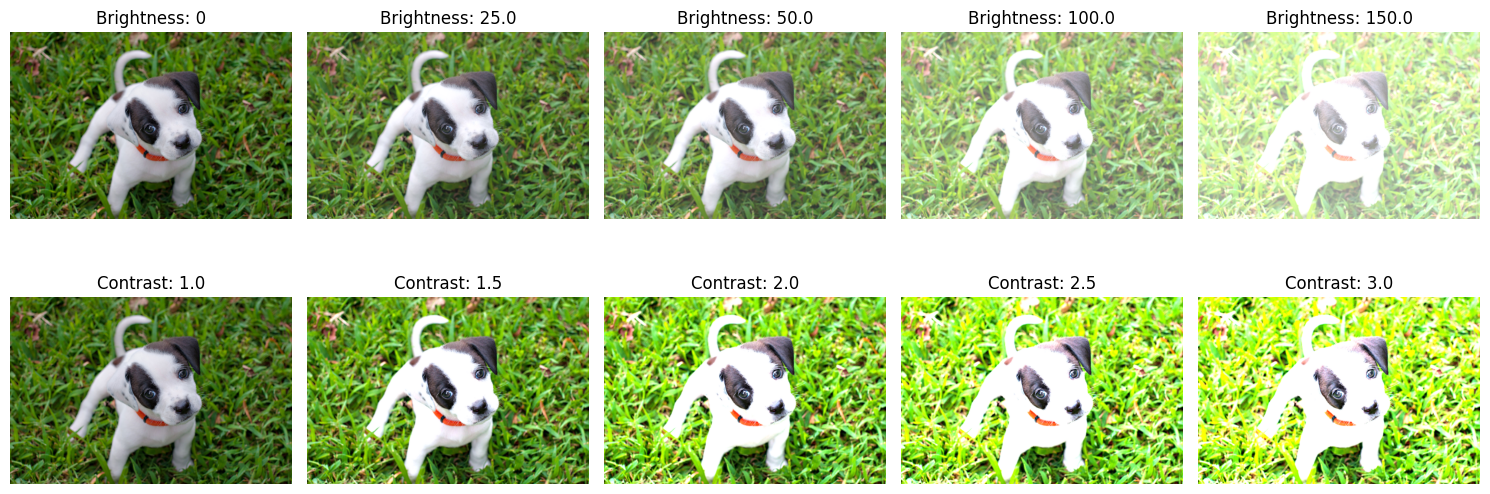

In [20]:
# anonimal function to test scales in alpha and beta
adjust_brightness_contrast = lambda img, a=1, b=0: cv2.convertScaleAbs(np.array(img), alpha=a, beta=b)
# scale of brightness and contrast
bright_scales = [0, 25.0, 50.0, 100.0, 150.0]
contrast_scales = [1.0, 1.5, 2.0, 2.5, 3.0]
# iterating the brightness dog imgs
brightness_dog_imgs = [adjust_brightness_contrast(img=dog_img, b=bright_scale) for bright_scale in bright_scales]
# iterating the contrast dog imgs
contrast_dog_imgs = [adjust_brightness_contrast(img=dog_img, a=contrast_scale) for contrast_scale in contrast_scales]

# ploting the results
fig, axs = plt.subplots(2, len(contrast_scales), figsize=(15,6))

for i, bright_img in enumerate(brightness_dog_imgs):
    axs[0, i].imshow(bright_img)
    axs[0, i].set_title(f"Brightness: {bright_scales[i]}")
    axs[0, i].axis("off")

for i, contrast_img in enumerate(contrast_dog_imgs):
    axs[1, i].imshow(contrast_img)
    axs[1, i].set_title(f"Contrast: {contrast_scales[i]}")
    axs[1, i].axis("off")

plt.tight_layout()
plt.show()

#### 1.2 Grayscale Conversion

An image normally is represented in RGB color space, which is a combination of Red, Green and Blue. The RGB color space is used to represent images in electronic systems, such as televisions and computers. Quality of a color image depends on the color represented by the number of bits the digital device could support:
+ 8 bits per channel (24 bits per pixel) = 256 levels of intensity per channel
+ 16 bits per channel (48 bits per pixel) = 65536 levels of intensity per channel
+ 32 bits per channel (96 bits per pixel) = 4294967296 levels of intensity per channel

Grayscale conversion is a process that converts an image from other color spaces to grayscale. This is done by taking the average of the RGB values of the pixel. Converting an image to grayscale is useful because it reduces the complexity of the image and makes it easier to handle bexause it reduces the number of channels from 3 to 1 and therefore the amount of data to process.

There are several ways to convert an image to grayscale, the most common are the following:
* **Average method**: The average of the RGB values is taken.
$$
\frac{R + G + B}{3}
$$

* **Luminosity method**: The average of the RGB values is taken, but the green channel is weighted more heavily.
$$
0.21R + 0.72G + 0.07B
$$
* **Desaturation method**: The average of the maximum and minimum RGB values is taken.
$$
\frac{max(R, G, B) + min(R, G, B)}{2}
$$



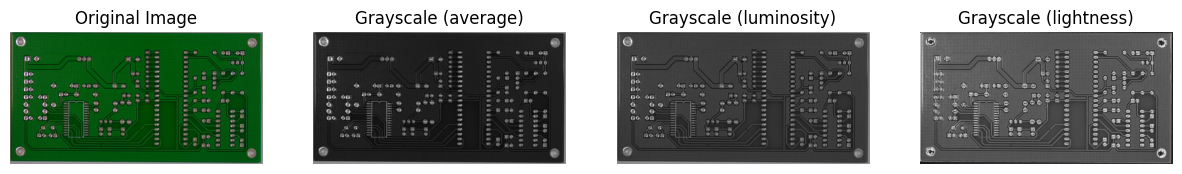

In [33]:
def grayscale_method(img, method):
    if method == 'average':
        return np.mean(img, axis=2).astype(np.uint8)
    elif method == 'luminosity':
        return np.dot(img, [0.21, 0.72, 0.07]).astype(np.uint8)
    elif method == 'lightness':
        return (np.max(img, axis=2) + np.min(img, axis=2)) // 2
    else:
        raise ValueError('Invalid method')
    
fig, axs = plt.subplots(1, 4, figsize=(15,6))
# Plotting the original image
axs[0].imshow(example_circuit_img)
axs[0].set_title("Original Image")
axs[0].axis("off")
# Plotting the grayscale images
for i, method in enumerate(['average', 'luminosity', 'lightness']):
    axs[i+1].imshow(grayscale_method(np.array(example_circuit_img), method), cmap='gray')
    axs[i+1].set_title(f"Grayscale ({method})")
    axs[i+1].axis("off")

https://do-marlay-ka-moonh.medium.com/converting-color-images-to-grayscale-ab0120ea2c1e
file:///Users/ricardomarcupido/Downloads/ic-2-c2g.pdf


#### 1.3 Contrast Stretching

Contrast Stretching is a technique that improves the contrast of an image by stretching the range of intensity values to span a desired range (0-255 for 8-bit images)

**Transformation used for contrast stretching**

<img src="./data/activity 1/stretching_transformation.png" alt="Stretching transformation" width="250"/>


The locations of points (*r<sub>1</sub>*,*s<sub>1</sub>*) and (*r<sub>2</sub>*, *s<sub>2</sub>*) control the shape of the transformation function.

If *r<sub>1</sub>* = *s<sub>1</sub>* and *r<sub>2</sub>* = *s<sub>2</sub>* the transformation is linear that produces no changes in the intensity.

If *r<sub>1</sub>* = *r<sub>2</sub>*, *s<sub>1</sub>* = 0, and *s<sub>2</sub>* = *L* - 1 the transformation becomes a thresholding function. (creates a binary image)

<img src="./data/activity 1/binary_img.png" alt="Binary image" width="100"/>

If (*r<sub>1</sub>*, *s<sub>1</sub>*) = (*r*<sub>min</sub>, 0) and (*r<sub>2</sub>*, *s<sub>2</sub>*) = (*r*<sub>max</sub>, *L* - 1) where *r*<sub>min</sub> and *r*<sub>max</sub> denote the minimum and maximum intensity levels in the input image.

<img src="./data/activity 1/contrast_stretching_formula.png" alt="contrast stretching formula" width="250"/>

where:

* *r*: Input pixel intensity.
* *r*<sub>min</sub> and *r*<sub>max</sub>: Minimum and maximum intensity values in the input image.
* *s*<sub>min</sub> and *s*<sub>max</sub>: Desired intensity range (e.g., 0-255).
* *s*: Output pixel intensity.


**when to use contrast stretching**:
* when our image has low contrast.
* Improving the constrast of X-rays images.

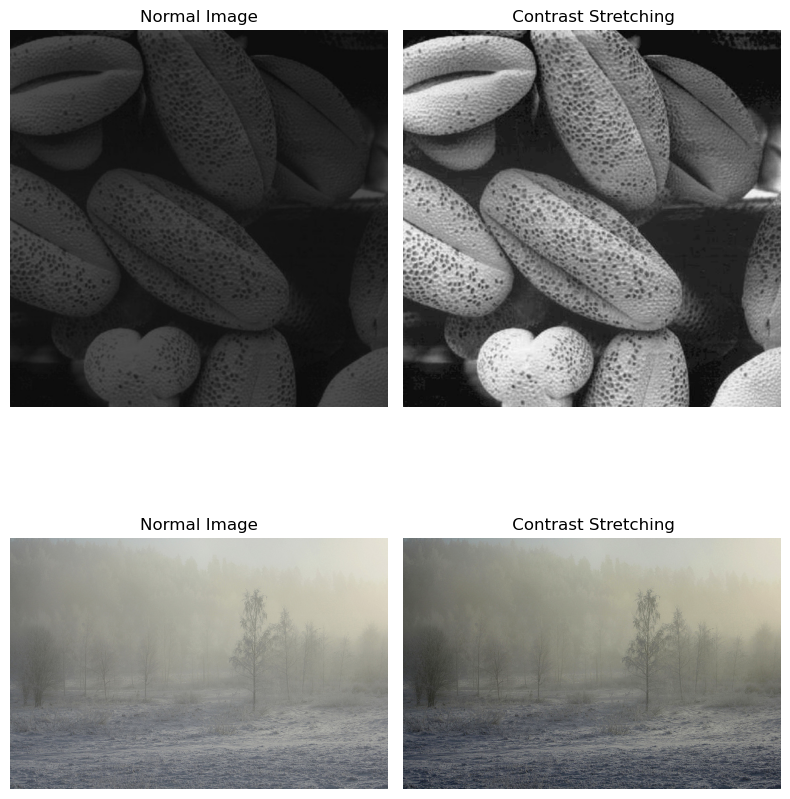

In [ ]:
def r_intensity(img):
    """
    calculating r_min and r_max intensity values in the input image
    """
    # Calculate r_min and r_max
    r_min, r_max = np.min(img), np.max(img)
    return { 'min': r_min, 'max': r_max }

# apply contrast stretching
def contrast_stretching(img, r_min, r_max):
    # Define desired INTENSITY s_min and s_max
    s_min, s_max = 0, 255
    # Output pixel intensity
    s = ((img - r_min) / (r_max - r_min) * (s_max - s_min) + s_min).astype(np.uint8)
    return s

# images as array
microscope_img_array = np.array(microscope_img)
paysage_img_array = np.array(paysage_img)

# getting intensity of images
r_microscope = r_intensity(microscope_img_array)
r_paysage = r_intensity(paysage_img_array)

# images to test contrast stretching
contrast_str_imgs = [
                     [microscope_img_array, contrast_stretching(microscope_img_array, r_microscope['min'], r_microscope['max'])],
                     [paysage_img_array, contrast_stretching(paysage_img_array, r_paysage['min'], r_paysage['max'])]]

labels = ["Normal Image", " Contrast Stretching"]

fig, axs = plt.subplots(2, 2, figsize=(8,10))
for i, _imgs in enumerate(contrast_str_imgs):
    for j, _img in enumerate(_imgs):
        axs[i, j].imshow(_img)
        axs[i, j].set_title(labels[j])
        axs[i, j].axis("off")

plt.tight_layout()
plt.show()

### 2. Negative Images and Their Applications: A Case Study in *specify case study*

An Image negative is a complete inversion of an image, where the lightest areas appear dark and the darkest areas appear light. The negative of an image is created by subtracting the pixel values from the maximum intensity value.

Some advantages of using negative images are:
* Enhancing the contrast of an image.
* Highlighting the edges of an image.
* Enhancing the visibility of certain features in an image.

Some applications of negative images are:
* Photography: Negative images are used in photography to create prints of photographs.
* Medical Imaging: Negative images are used in medical imaging to enhance the visibility of certain features in X-ray images.
* Art: Negative images are used in art to create unique and interesting visual effects.

In specific case study, we are going to apply negative images to enhance the visibility of certain features in X-ray images. One of the main advantages of using negative images in X-ray imaging is that it can help to improve the visibility of certain features that may be difficult to see in a standard X-ray image. By creating a negative image of an X-ray, it is possible to enhance the contrast of the image and highlight the edges of bones and other structures, making it easier to identify and analyze these features.

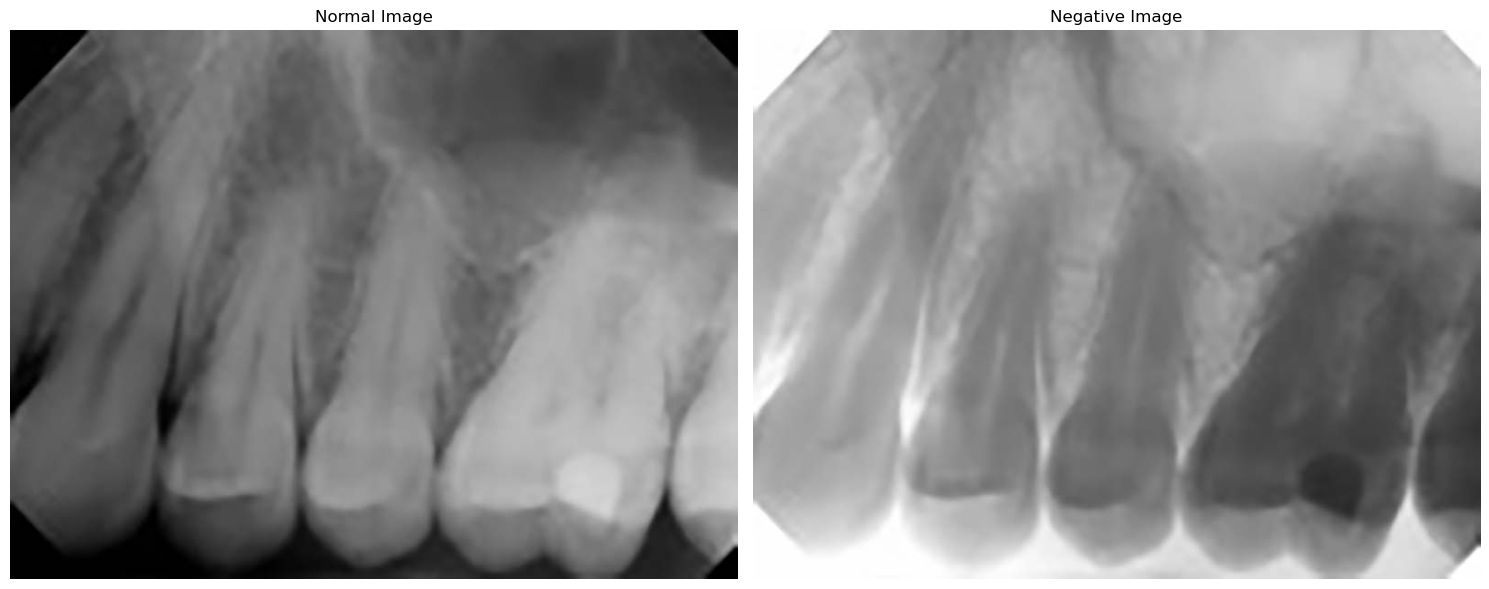

In [ ]:
dental_array_img = np.array(dental_img)
negative = 255 - dental_array_img
dental_imgs = [ dental_array_img, negative]
labels = ["Normal Image", "Negative Image"]

fig, axs = plt.subplots(1, 2, figsize=(15,6))
for i, dental in enumerate(dental_imgs):
    axs[i].imshow(dental)
    axs[i].set_title(labels[i])
    axs[i].axis("off")

plt.tight_layout()
plt.show()

### 3. Gamma Correction and its Application: A Case Study in *specify case study*

Gamma correction is a technique used to adjust the brightness and contrast of an image by applying a non-linear transformation to the pixel values. The gamma correction function is defined as: a power-law function that raises the input pixel values to a certain power (gamma value).

The gamma correction function is given by the formula:

$$
s = c \cdot r^{\gamma}
$$

where:
* *r*: Input pixel intensity.
* *s*: Output pixel intensity.
* *c*: Constant of proportionality.
* *gamma*: Gamma value.

The gamma value controls the shape of the gamma correction function and determines how the pixel values are adjusted. A gamma value greater than 1 will increase the contrast of the image, while a gamma value less than 1 will decrease the contrast of the image.

Some applications of gamma correction are:
* Photography: Gamma correction is used in photography to adjust the brightness and contrast of images.
* Satellite Imaging: Gamma correction is used in satellite imaging to enhance the visibility of features in satellite images.
* Medical Imaging: Gamma correction is used in medical imaging to adjust the brightness and contrast of X-ray images.

In specific case study, we are going to apply gamma correction to enhance the visibility of features in satellite images. One of the main advantages of using gamma correction in satellite imaging is that it can help to improve the visibility of features that may be difficult to see in a standard satellite image. By adjusting the gamma value, it is possible to enhance the contrast of the image and highlight the edges of features, making it easier to identify and analyze these features. 

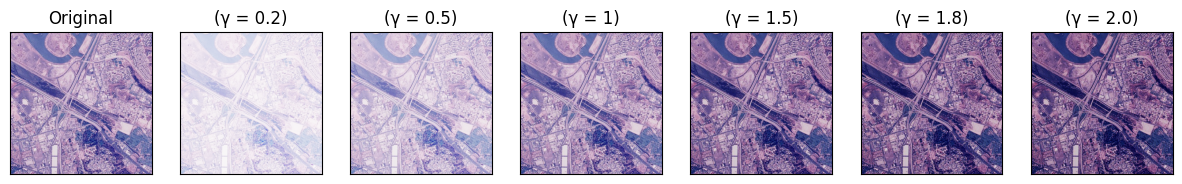

In [33]:
map_array_img = np.array(map_img)

gammaImages = [map_array_img]
gammaValues = [0.2, 0.5, 1, 1.5, 1.8, 2.0]

for i in range(len(gammaValues)):
  gammaImages.append(np.array(255 * (map_array_img / 255) ** gammaValues[i], dtype=np.uint8))

plt.figure(figsize=(15, 5))

for i in range(len(gammaImages)):
    plt.subplot(1, len(gammaImages), i + 1)
    plt.imshow(gammaImages[i])

    # Corregir los títulos
    plt.title("Original" if i == 0 else f"(γ = {gammaValues[i - 1]})")

    plt.xticks([])
    plt.yticks([])

plt.show()

Image:
https://www.kaggle.com/datasets/luffyluffyluffy/the-uscsipi-image-database

Code:
https://medium.com/@koushikc2000/basic-operations-on-images-using-opencv-python-cb0d60d11911

### 4. Image substraction and its Application: A Case Study in *specify case study*

image subtraction is a technique used to enhance the visibility of differences between two images by subtracting the pixel values of one image from the pixel values of another image. The result of the subtraction is a new image that highlights the differences between the two images.

The advantage of using image subtraction is that it can help to identify and analyze changes in an image that may be difficult to see in the original images. By subtracting the pixel values of one image from another image, it is possible to enhance the contrast of the image and highlight the differences between the two images.

Some applications of image subtraction are:
* Medical Imaging: Image subtraction is used in medical imaging to identify changes in X-ray images over time.
* Security: Image subtraction is used in security applications to detect changes in surveillance images.
* Forensics: Image subtraction is used in forensics to analyze differences between images.

In this especific case of study we are going to use it to iddentify errors on electronic circuits. One of the main advantages of using image subtraction in electronic circuits is that it can help to identify errors in the circuit that may be difficult to see in the original images. By subtracting the pixel values of one image from another image, it is possible to enhance the contrast of the image and highlight the differences between the two images, making it easier to identify and analyze errors in the circuit.

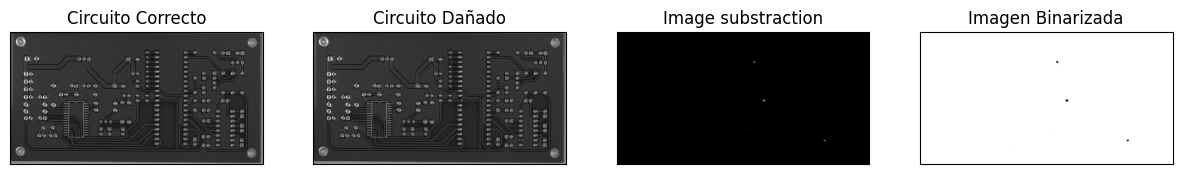

In [68]:
example_circuit_gray = cv2.cvtColor(np.array(example_circuit_img), cv2.COLOR_BGR2GRAY)
defected_circuit_gray = cv2.cvtColor(np.array(defected_circuit_img), cv2.COLOR_BGR2GRAY)

img2 = cv2.resize(defected_circuit_gray, (example_circuit_gray.shape[1], example_circuit_gray.shape[0]))

# Diferencia entre imágenes
diff = cv2.absdiff(example_circuit_gray, defected_circuit_gray)

# Binarizando
thresh = cv2.threshold(diff, 40, 255, cv2.THRESH_BINARY)[1]

inverted_diff = cv2.bitwise_not(thresh)

plt.figure(figsize=(15,5))
plt.subplot(1,4,1), plt.imshow(example_circuit_gray, cmap='gray'), plt.title("Circuito Correcto")
plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2), plt.imshow(defected_circuit_gray, cmap='gray'), plt.title("Circuito Dañado")
plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3), plt.imshow(diff, cmap='gray'), plt.title("Image substraction")
plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4), plt.imshow(inverted_diff, cmap='gray'), plt.title("Imagen Binarizada")
plt.xticks([]), plt.yticks([])
plt.show()

Dataset: https://www.kaggle.com/datasets/akhatova/pcb-defects

### References
[1] Smith, J., & Doe, A. (2020). *Title of the Paper*. Journal Name, Volume(Issue), pages. [DOI or URL](https://doi.org/example).

[2] Illustration of transforms — Torchvision main documentation. (2017). [https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html#:~:text=Photometric%20image%20transformation%20refers%20to,while%20preserving%20its%20geometric%20structure].
